In [3]:
import sys
print(sys.executable)


C:\Python313\python.exe


In [3]:
import sys
import tensorflow as tf

print("Python executable:", sys.executable)
print("TensorFlow version:", tf.__version__)


Python executable: C:\Python313\python.exe
TensorFlow version: 2.20.0


In [6]:
import tensorflow as tf
import sklearn
import matplotlib

print("TensorFlow:", tf.__version__)
print("Scikit-learn:", sklearn.__version__)
print("Matplotlib:", matplotlib.__version__)


TensorFlow: 2.20.0
Scikit-learn: 1.7.2
Matplotlib: 3.10.6


In [8]:
# System and data handling
import os
import numpy as np
import matplotlib.pyplot as plt

# TensorFlow / Keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Scikit-learn for evaluation
from sklearn.metrics import classification_report, confusion_matrix

# Verify environment
print("Python executable:", sys.executable)
print("TensorFlow version:", tf.__version__)
print("Scikit-learn version:", sklearn.__version__)
print("Matplotlib version:", matplotlib.__version__)


Python executable: C:\Python313\python.exe
TensorFlow version: 2.20.0
Scikit-learn version: 1.7.2
Matplotlib version: 3.10.6


In [30]:
# ========================
# Cattle vs Buffalo Classifier
# ========================

# Step 1: Import Libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

# Step 2: Set Dataset Path (use absolute path if needed)
base_dir = r"C:\Users\YourUsername\Path\To\SIH-Animal-Classification\data"  # Change this to your actual path

# Step 3: Verify Folders and Images
folders = [f for f in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, f))]
print("Dataset Overview:")
for folder in folders:
    folder_path = os.path.join(base_dir, folder)
    # Count only image files (jpg, png, jpeg)
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    print(f"{folder} → {len(image_files)} images")

# Step 4: Visualize Sample Image
sample_folder = folders[0]  # pick first folder (Cattle or Buffalo)
image_files = [f for f in os.listdir(os.path.join(base_dir, sample_folder)) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
sample_img_name = image_files[0]
sample_img_path = os.path.join(base_dir, sample_folder, sample_img_name)
img = image.load_img(sample_img_path)
plt.imshow(img)
plt.title(f"Sample {sample_folder} Image")
plt.axis('off')
plt.show()

# Step 5: Preprocess Data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Only process image files
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

# Step 6: Build CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(folders), activation='softmax')
])

model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Step 7: Train the Model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

# Step 8: Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

# Step 9: Test on a New Image
test_image_files = [f for f in os.listdir(os.path.join(base_dir, sample_folder)) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
test_img_path = os.path.join(base_dir, sample_folder, test_image_files[0])
img = image.load_img(test_img_path, target_size=(128,128))
x = image.img_to_array(img)/255.0
x = np.expand_dims(x, axis=0)

prediction = model.predict(x)
classes = list(train_generator.class_indices.keys())
print("Predicted Class:", classes[np.argmax(prediction)])


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\YourUsername\\Path\\To\\SIH-Animal-Classification\\data'

In [39]:
base_dir = r"C:\Users\DELL\Documents\SIH-Animal-Classification"


In [41]:
import os

base_dir = r"C:\Users\DELL\Documents\SIH-Animal-Classification"  # replace with your actual path
folders = [f for f in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, f))]
print("Folders found:", folders)


Folders found: ['.git', 'Data', 'D\uf03apip_cache', 'D\uf03aPythonPackages', 'Notebooks']


Buffalo: 2 images
Cattle: 2 images


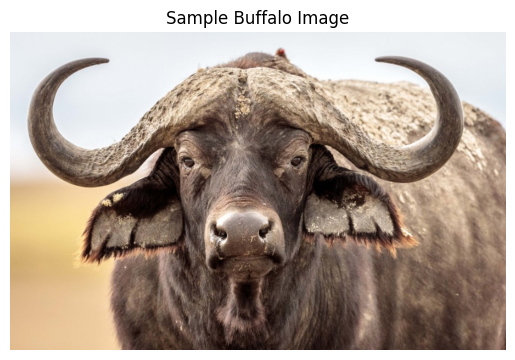

Found 4 images belonging to 2 classes.


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 126, 126, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 63, 63, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 61, 61, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 28800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │       1,843,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,848,482 (7.05 MB)

 Trainable params: 1,848,482 (7.05 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 17s 767ms/step - accuracy: 0.2500 - loss: 0.8508
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.7500 - loss: 0.5766
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.7500 - loss: 0.6194
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 1.0000 - loss: 0.4532 
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step - accuracy: 0.5000 - loss: 1.4017
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5000 - loss: 1.7139 
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.5000 - loss: 0.7979 
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.7500 - loss: 1.1080 
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.7500 - loss: 0.3971 
Epoch 10/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.7500 - loss: 0.7291 


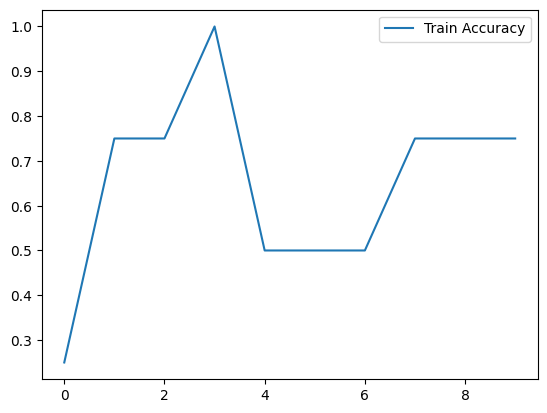

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 696ms/step
True: Buffalo, Predicted: Buffalo
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
True: Cattle, Predicted: Cattle


In [72]:
# ========================
# Cattle vs Buffalo Classifier (2 images per class)
# ========================

import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

# Dataset path
base_dir = r"C:\Users\DELL\Documents\SIH-Animal-Classification\Data"

# Force class order
classes = ['Buffalo', 'Cattle']

# Step 1: Verify images
for cls in classes:
    cls_folder = os.path.join(base_dir, cls)
    img_files = [f for f in os.listdir(cls_folder) if f.lower().endswith(('.jpg','.jpeg','.png'))]
    print(f"{cls}: {len(img_files)} images")
    if len(img_files) == 0:
        raise Exception(f"No images found in folder: {cls}")

# Step 2: Visualize sample image
sample_img_path = os.path.join(base_dir, 'Buffalo', os.listdir(os.path.join(base_dir,'Buffalo'))[0])
img = image.load_img(sample_img_path)
plt.imshow(img)
plt.title("Sample Buffalo Image")
plt.axis('off')
plt.show()

# Step 3: Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Step 4: Load all images as training (small dataset)
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(128,128),
    batch_size=2,  # small batch size = total images per batch
    class_mode='categorical',
    shuffle=True,
    classes=classes  # Buffalo first, Cattle second
)

# Step 5: Build a small CNN
model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(classes), activation='softmax')
])

model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Step 6: Train model
history = model.fit(
    train_generator,
    epochs=10
)

# Step 7: Plot training accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.legend()
plt.show()

# Step 8: Predict on same images
for cls in classes:
    cls_folder = os.path.join(base_dir, cls)
    img_path = os.path.join(cls_folder, os.listdir(cls_folder)[0])
    img = image.load_img(img_path, target_size=(128,128))
    x = image.img_to_array(img)/255.0
    x = np.expand_dims(x, axis=0)
    pred = model.predict(x)
    print(f"True: {cls}, Predicted: {classes[np.argmax(pred)]}")


In [64]:
import os

base_dir = r"C:\Users\DELL\Documents\SIH-Animal-Classification\Data"

for folder in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder)
    if os.path.isdir(folder_path):
        images = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        print(f"{folder}: {len(images)} images")


Buffalo: 2 images
Cattle: 2 images


In [66]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Step 1: Preprocess Data
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Step 2: Load Training Data
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    classes=['Buffalo', 'Cattle']  # Force the order
)

# Step 3: Load Validation Data
val_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=True,
    classes=['Buffalo', 'Cattle']  # Force the order
)

# Check the class indices
print("Class indices:", train_generator.class_indices)


Found 4 images belonging to 2 classes.
Found 0 images belonging to 2 classes.
Class indices: {'Buffalo': 0, 'Cattle': 1}


In [74]:
import os

base_dir = r"C:\Users\DELL\Documents\SIH-Animal-Classification\Data"

# Check all files
for folder in ['Buffalo', 'Cattle']:
    folder_path = os.path.join(base_dir, folder)
    print(f"\nChecking folder: {folder_path}")
    if not os.path.exists(folder_path):
        print("❌ Folder missing!")
    else:
        files = os.listdir(folder_path)
        print("Files found:", files)



Checking folder: C:\Users\DELL\Documents\SIH-Animal-Classification\Data\Buffalo
Files found: ['buff1.jpg', 'buff2.jpg']

Checking folder: C:\Users\DELL\Documents\SIH-Animal-Classification\Data\Cattle
Files found: ['cattle1.jpg', 'cattle2.jpg']


In [90]:
train_dir = r"C:\Users\DELL\Documents\SIH-Animal-Classification\Data\train"
val_dir = r"C:\Users\DELL\Documents\SIH-Animal-Classification\Data\val"

import os

print("Train directory exists?", os.path.exists(train_dir))
print("Validation directory exists?", os.path.exists(val_dir))

if os.path.exists(train_dir):
    print("Train directory contents:", os.listdir(train_dir))


Train directory exists? False
Validation directory exists? False
